In [8]:
import pandas as pd

In [9]:
aubio = pd.read_csv("results/Aubio/scores.csv")
amdf = pd.read_csv("results/TarsosDSP_AMDF/scores.csv")
dynamic_wavelet = pd.read_csv("results/TarsosDSP_DynamicWavelet/scores.csv")
fast_yin = pd.read_csv("results/TarsosDSP_FastYin/scores.csv")
mcleod = pd.read_csv("results/TarsosDSP_McLeod/scores.csv")
yin = pd.read_csv("results/TarsosDSP_Yin/scores.csv")

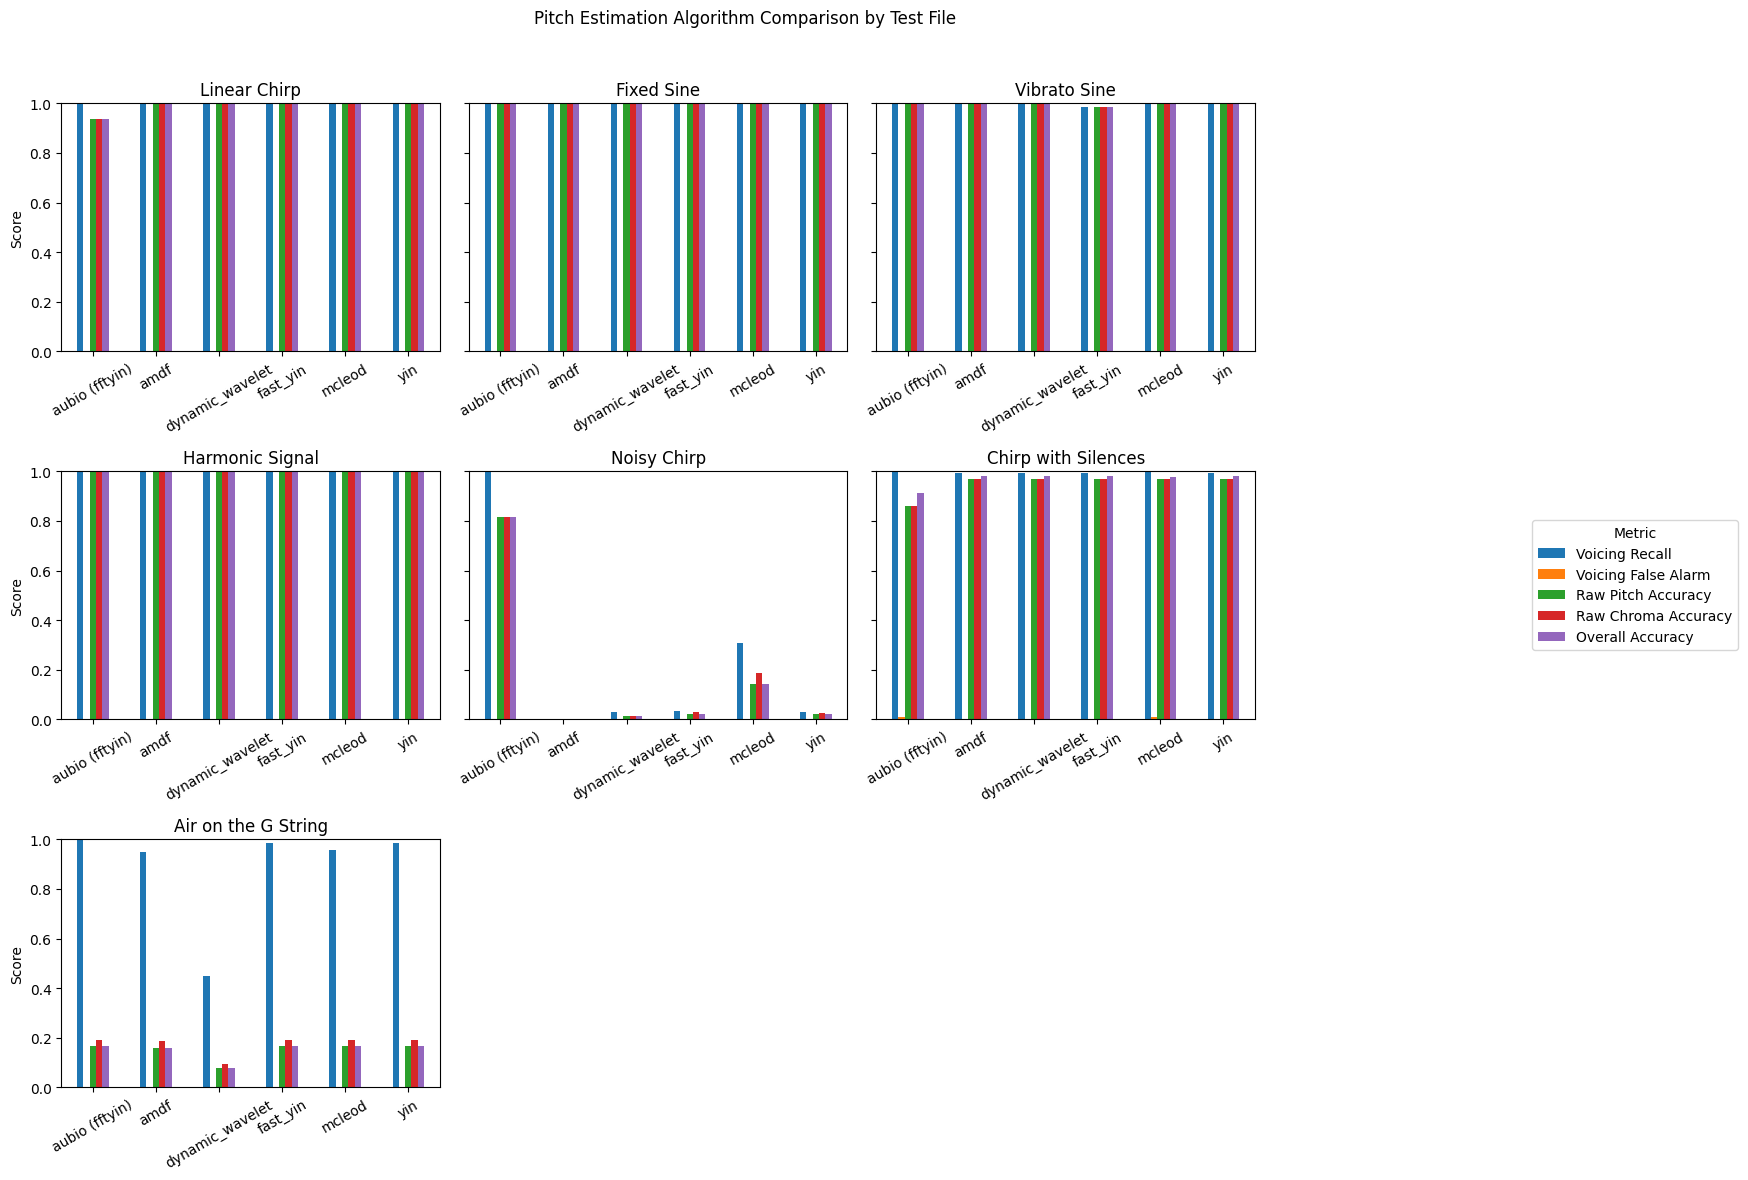

In [10]:
import math

import matplotlib.pyplot as plt

# map algorithm names to their dataframes
dfs = {
    'aubio (fftyin)': aubio,
    'amdf': amdf,
    'dynamic_wavelet': dynamic_wavelet,
    'fast_yin': fast_yin,
    'mcleod': mcleod,
    'yin': yin,
}

# test files in row order
test_names = [
    'Linear Chirp',
    'Fixed Sine',
    'Vibrato Sine',
    'Harmonic Signal',
    'Noisy Chirp',
    'Chirp with Silences',
    'Air on the G String'
]

# columns / metrics (reuse existing 'cols' if present)
cols = ['Voicing Recall', 'Voicing False Alarm', 'Raw Pitch Accuracy',
        'Raw Chroma Accuracy', 'Overall Accuracy']

n_tests = len(test_names)
ncols = 3
nrows = math.ceil(n_tests / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows), sharey=True)
axes = axes.flatten()

for i, test_name in enumerate(test_names):
    # build combined dataframe for this test row across algorithms
    df_test = pd.DataFrame({name: df.iloc[i] for name, df in dfs.items()}).T
    df_test = df_test[cols]
    ax = axes[i]
    df_test.plot(kind='bar', ax=ax, rot=30, legend=False)
    ax.set_title(test_name)
    ax.set_ylim(0, 1)
    if i % ncols == 0:
        ax.set_ylabel('Score')

# hide any unused subplots
for j in range(n_tests, len(axes)):
    axes[j].axis('off')

# single legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Metric', bbox_to_anchor=(1.02, 0.5), loc='center left')

fig.suptitle('Pitch Estimation Algorithm Comparison by Test File')
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
plt.show()